In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_final = pd.read_csv('data\COVID-19-final.csv', ';')

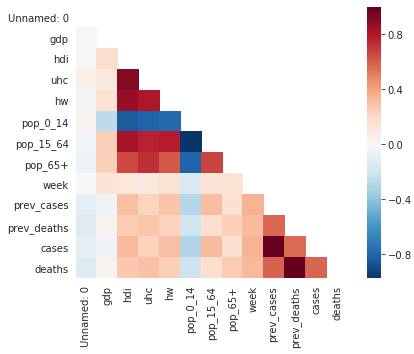

In [3]:
corr = df_final.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, center=0, cmap='RdBu_r', square=True)

# Treinamento

In [4]:
X = df_final[['gdp','hdi','uhc','hw','pop_0_14','pop_15_64','pop_65+','week','prev_cases','prev_deaths']]
X.head()

,gdp,hdi,uhc,hw,pop_0_14,pop_15_64,pop_65+,week,prev_cases,prev_deaths
0,8.273686e+10,0.496,0.37,0.3775,0.430902,0.543249,0.025849,1,0.000000,0.0
1,8.273686e+10,0.496,0.37,0.3775,0.430902,0.543249,0.025849,2,0.002629,0.0
2,8.273686e+10,0.496,0.37,0.3775,0.430902,0.543249,0.025849,3,0.010515,0.0
3,8.273686e+10,0.496,0.37,0.3775,0.430902,0.543249,0.025849,4,0.042059,0.0
4,8.273686e+10,0.496,0.37,0.3775,0.430902,0.543249,0.025849,5,0.089375,0.0


In [5]:
y = df_final[['cases','deaths']]
y.head()

,cases,deaths
0,0.002629,0.000000
1,0.010515,0.000000
2,0.042059,0.000000
3,0.089375,0.000000
4,0.299671,0.010515


In [6]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from math import sqrt

In [7]:
random_state = 40
n_splits = 10
turns = 5

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
kf = KFold(n_splits)

print('train: X', X_train.shape, '- y', y_train.shape, '- KFold splits', n_splits)
print(' test: X', X_test.shape, '- y', y_test.shape)

train: X (740, 10) - y (740, 2) - KFold splits 10
 test: X (186, 10) - y (186, 2)


In [8]:
y_var = 'cases'

max_depth = 100
min_samples_leaf = 5

dtree = DecisionTreeRegressor(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=random_state)

In [9]:
algoritmo = dtree
y_train = y_train[y_var]
for train_idx, val_idx in kf.split(X_train, y_train):
    Xk = X_train.iloc[train_idx]
    yk = y_train.iloc[train_idx]
    
    algoritmo.fit(Xk, yk)
    pred = algoritmo.predict(Xk)
    
    mae = mean_absolute_error(yk, pred)
    r2s = r2_score(yk, pred)
    
    print("MAE: {:3.6f}  R2 score: {:3.6f}".format(mae, r2s))

MAE: 4.495214  R2 score: 0.973097
MAE: 4.437284  R2 score: 0.984982
MAE: 4.405102  R2 score: 0.984930
MAE: 4.376104  R2 score: 0.983996
MAE: 4.500246  R2 score: 0.984708
MAE: 5.046525  R2 score: 0.973353
MAE: 4.284747  R2 score: 0.987514
MAE: 4.961181  R2 score: 0.973835
MAE: 4.393126  R2 score: 0.984824
MAE: 5.061696  R2 score: 0.963823


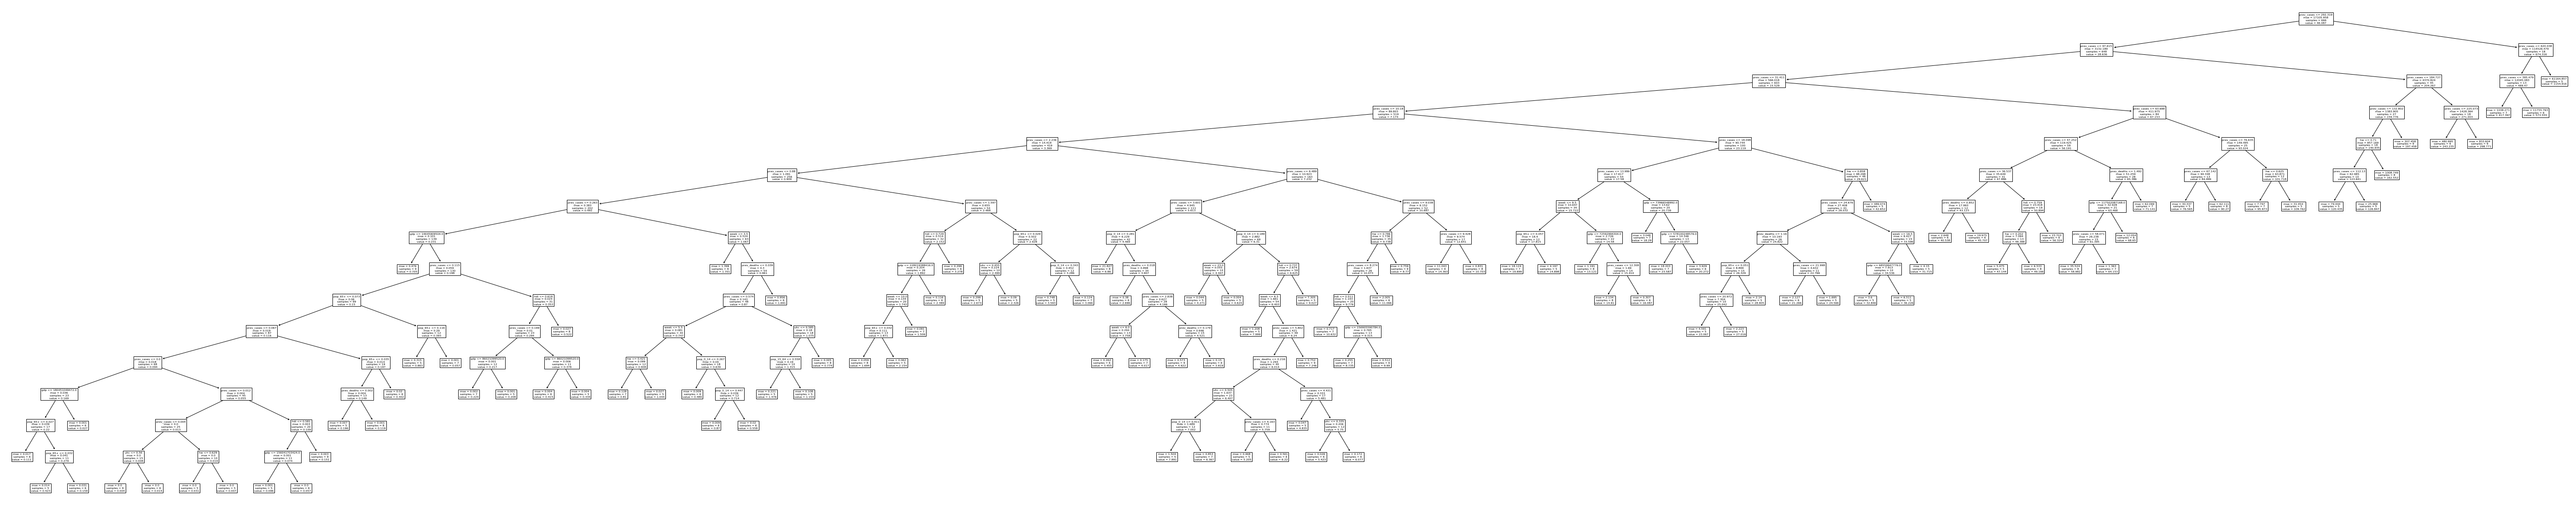

In [10]:
fig, ax = plt.subplots(figsize=(100, 20))
tree.plot_tree(dtree, fontsize=6, feature_names=X_train.columns)
plt.plot()
plt.savefig('tree_high_dpi', dpi=100)

# Teste

In [11]:
pred_test = algoritmo.predict(X_test)
mae_test = mean_absolute_error(y_test['cases'], pred_test)
r2s_test = r2_score(y_test['cases'], pred_test)
print("MAE: {:3.6f}  R2 score: {:3.6f}".format(mae_test, r2s_test))

MAE: 5.031918  R2 score: 0.977468
